In [15]:
import tensorflow as  tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [16]:
(X_train, y_train) , (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [17]:
X_test.shape

(10000, 32, 32, 3)

In [18]:
classes =  ["airplane", "automobile", "bird", "cat","deer","dog","frog","horse","ship", "truck"]

In [19]:

y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [20]:
def plot_sample(X,y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

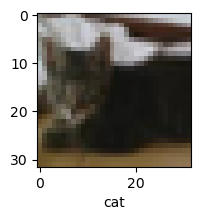

In [21]:
plot_sample(X_train,y_train,9)

In [22]:
X_train = X_train/255.0
X_test = X_test/255.0

In [23]:
ann =  models.Sequential([
    
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid')
])

ann.compile(optimizer =  'SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

ann.fit(X_train, y_train, epochs = 5)

Epoch 1/5


2024-08-26 13:06:44.403299: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1563/1563 [==============================] - 45s 28ms/step - loss: 1.8164 - accuracy: 0.3544
Epoch 2/5
1563/1563 [==============================] - 52s 33ms/step - loss: 1.6270 - accuracy: 0.4262
Epoch 3/5
1563/1563 [==============================] - 45s 29ms/step - loss: 1.5444 - accuracy: 0.4572
Epoch 4/5
1563/1563 [==============================] - 48s 31ms/step - loss: 1.4829 - accuracy: 0.4787
Epoch 5/5
1563/1563 [==============================] - 42s 27ms/step - loss: 1.4325 - accuracy: 0.4962


In [24]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.5058 - accuracy: 0.4605


[1.5057669878005981, 0.46050000190734863]

In [26]:
cnn =  models.Sequential([
    layers.Conv2D(filters =  32, activation = 'relu', kernel_size = (3,3), input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters =  64, activation = 'relu', kernel_size = (3,3)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [27]:
cnn.compile(optimizer =  'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


In [28]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.4221 - accuracy: 0.4877
Epoch 2/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.0636 - accuracy: 0.6288
Epoch 3/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9398 - accuracy: 0.6754
Epoch 4/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8610 - accuracy: 0.7012
Epoch 5/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.7941 - accuracy: 0.7248
Epoch 6/10
1563/1563 [==============================] - 23s 14ms/step - loss: 0.7354 - accuracy: 0.7462
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.6826 - accuracy: 0.7631
Epoch 8/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.6378 - accuracy: 0.7773
Epoch 9/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.5991 - accuracy: 0.7901
Epoch 10/10
1563/1563 [==============================] - 22s 14m

In [30]:
y_test = y_test.reshape(-1,)

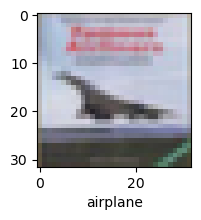

In [40]:
plot_sample(X_test,y_test,3)

In [32]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 2s 5ms/step


In [33]:
y_pred[:5]

array([[9.8040720e-05, 6.5813733e-06, 1.4692216e-04, 9.9300897e-01,
        4.0101484e-05, 4.3596681e-03, 1.5454818e-03, 2.0605705e-06,
        7.7979226e-04, 1.2390997e-05],
       [9.2279591e-04, 2.9602159e-02, 2.2166465e-05, 2.6927351e-05,
        9.7398413e-07, 2.1586484e-07, 2.3326914e-09, 1.0333663e-08,
        9.6718007e-01, 2.2446706e-03],
       [6.5629423e-02, 4.8097819e-01, 7.0013450e-03, 1.9209389e-02,
        3.5669096e-03, 1.4641284e-03, 4.2433647e-04, 4.5696953e-03,
        3.8158056e-01, 3.5576019e-02],
       [9.3886989e-01, 1.1828905e-03, 1.1964068e-02, 1.0885084e-03,
        4.0815291e-03, 8.5168108e-07, 1.1684595e-03, 6.9539902e-07,
        4.1331023e-02, 3.1213157e-04],
       [4.8044335e-06, 2.5108059e-06, 5.4381326e-02, 1.1224432e-01,
        6.0788654e-02, 1.6838526e-03, 7.7072805e-01, 9.2442821e-07,
        1.6497815e-04, 5.1875304e-07]], dtype=float32)

In [34]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [35]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

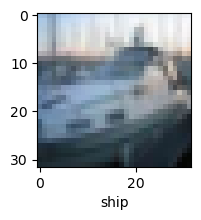

In [43]:
plot_sample(X_test,y_test,2)

In [44]:
classes[y_classes[2]]

'automobile'